In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv('Orders_merged.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp'])

# 3. Data overview
print(df.shape)
print(df.info())
display(df.head())

# 4. Data cleaning (drop duplicates, handle missing values)
df = df.drop_duplicates()
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Fill or drop missing values as appropriate
# Example: fillna for review_score, drop rows with missing order_id
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df = df.dropna(subset=['order_id'])

# 5. Key metrics
# GMV (Gross Merchandise Value)
gmv = df['payment_value'].sum()
print(f"GMV: {gmv:,.2f}")

# Order count
order_count = df['order_id'].nunique()
print(f"Order count: {order_count}")

# Customer count
customer_count = df['customer_id'].nunique()
print(f"Customer count: {customer_count}")

# Seller count
seller_count = df['seller_id'].nunique()
print(f"Seller count: {seller_count}")

# Average order value
aov = gmv / order_count
print(f"Average Order Value: {aov:.2f}")

# Average customer spend
acs = gmv / customer_count
print(f"Average Customer Spend: {acs:.2f}")

# 6. Time-based analysis
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_gmv = df.groupby('order_month')['payment_value'].sum()
monthly_orders = df.groupby('order_month')['order_id'].nunique()

plt.figure(figsize=(12,5))
monthly_gmv.plot(marker='o')
plt.title('Monthly GMV')
plt.ylabel('GMV')
plt.xlabel('Month')
plt.show()

plt.figure(figsize=(12,5))
monthly_orders.plot(marker='o', color='orange')
plt.title('Monthly Order Count')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.show()

# 7. Customer and seller distribution by state
customer_state = df['customer_state'].value_counts()
seller_state = df['seller_state'].value_counts()

plt.figure(figsize=(10,4))
customer_state.plot(kind='bar')
plt.title('Customer Distribution by State')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,4))
seller_state.plot(kind='bar', color='green')
plt.title('Seller Distribution by State')
plt.ylabel('Number of Sellers')
plt.show()

# 8. Product category analysis
category_gmv = df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
category_gmv.plot(kind='bar')
plt.title('Top 10 Product Categories by GMV')
plt.ylabel('GMV')
plt.show()

# 9. Review score analysis
review_score_dist = df['review_score'].value_counts().sort_index()
plt.figure(figsize=(8,4))
review_score_dist.plot(kind='bar')
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 10. Delivery analysis
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
plt.figure(figsize=(10,4))
sns.histplot(df['delivery_days'].dropna(), bins=30, kde=True)
plt.title('Delivery Days Distribution')
plt.xlabel('Days')
plt.show()

# 11. Payment type analysis
payment_type_dist = df['payment_type'].value_counts()
plt.figure(figsize=(8,4))
payment_type_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Type Distribution')
plt.ylabel('')
plt.show()

(96478, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   product_id                     96478 non-null  object        
 1   seller_id                      96478 non-null  object        
 2   order_id                       96478 non-null  object        
 3   customer_id                    96478 non-null  object        
 4   order_status                   96478 non-null  object        
 5   order_purchase_timestamp       96478 non-null  datetime64[ns]
 6   order_approved_at              96464 non-null  datetime64[ns]
 7   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 8   order_delivered_customer_date  96470 non-null  datetime64[ns]
 9   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 10  customer_unique_id             96478 non-null  object        
 11  cus

,product_id,seller_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:00,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:00,2018-06-20,...,sao paulo,SP,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:00,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:00,2018-01-05,...,penapolis,SP,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:00,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:00,2018-01-16,...,ibitinga,SP,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:00,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:00,2018-08-24,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:00,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:00,2018-08-27,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


Missing values:
 product_id                           0
seller_id                            0
order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        8
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             85171
review_comment_message           56926
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
order_item_id                        0
price   

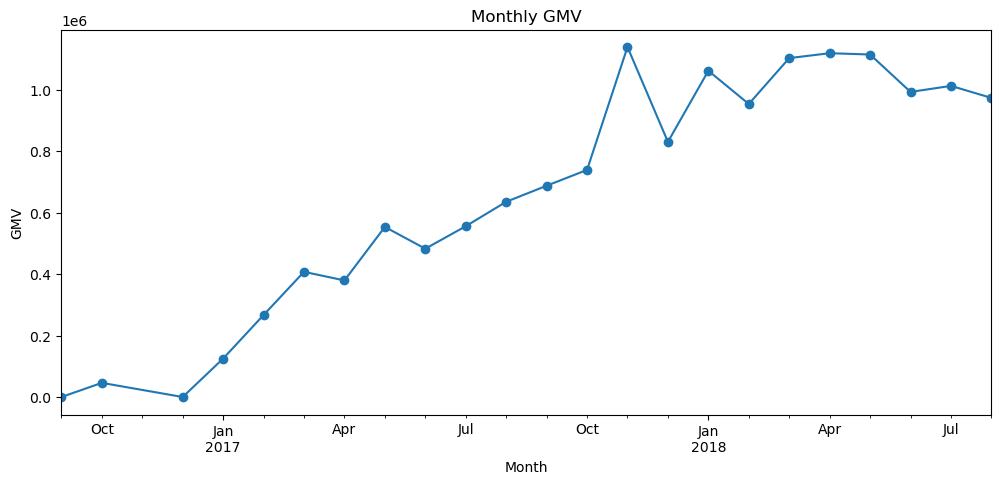

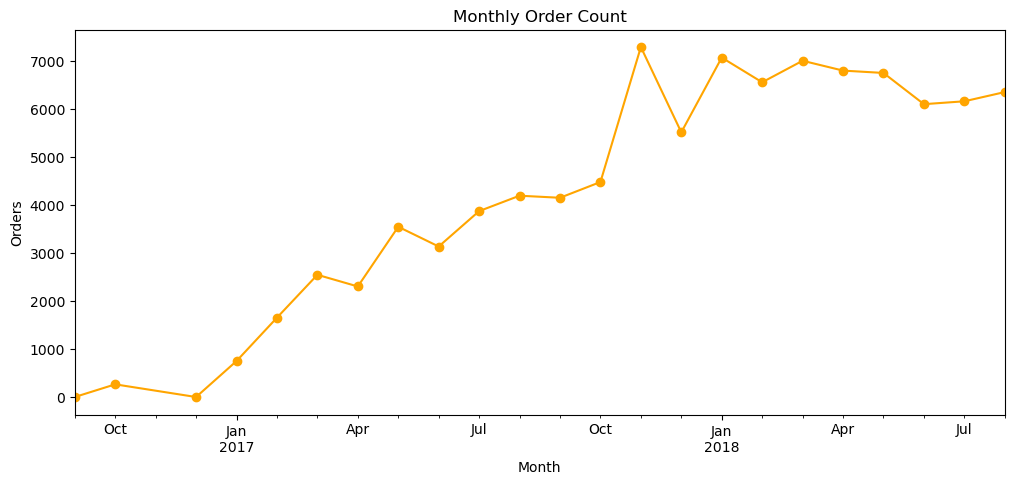

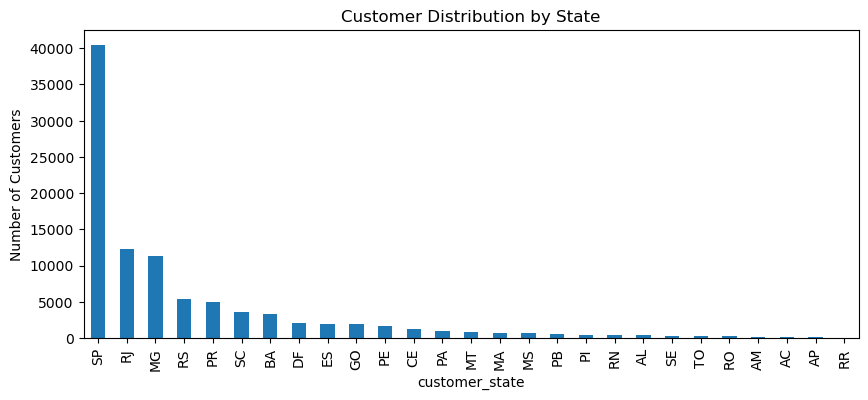

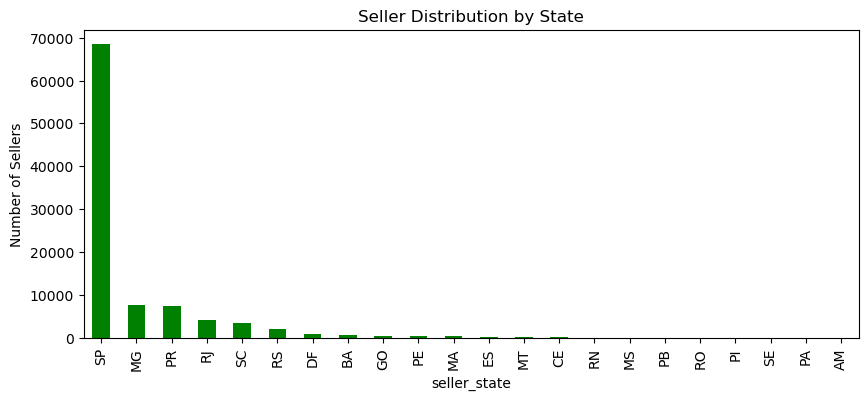

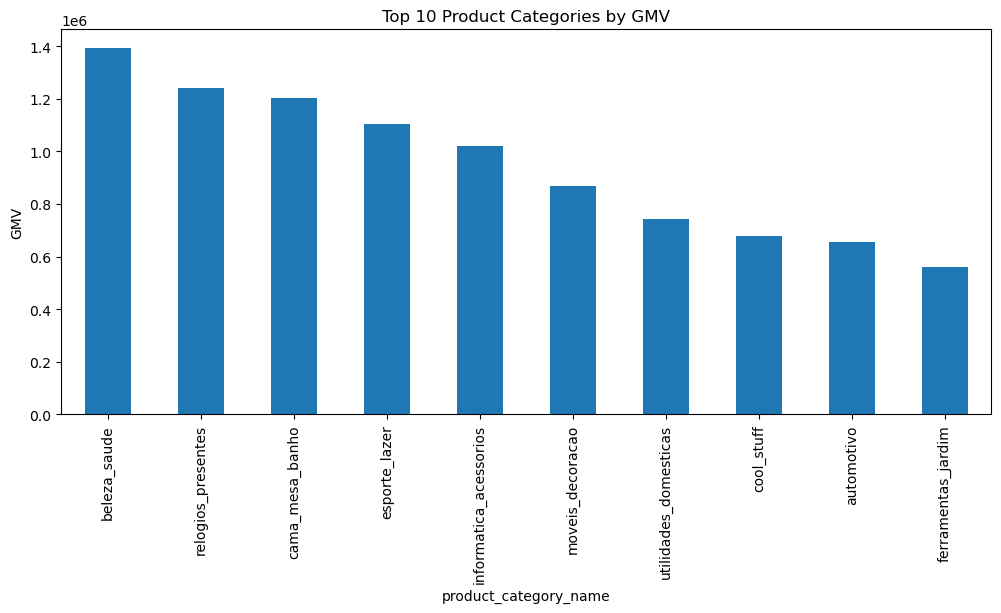

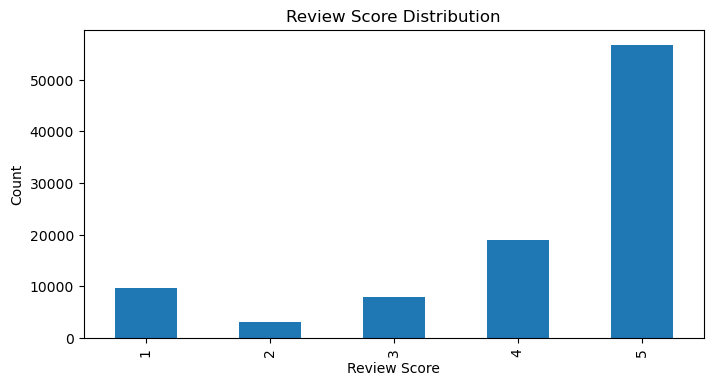

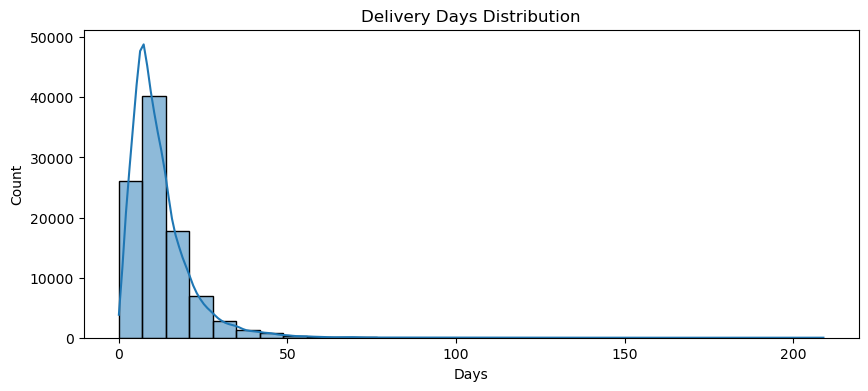

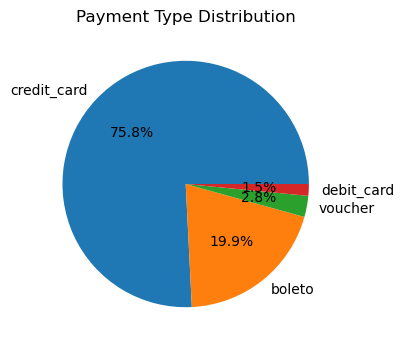

=== 数据加载与预处理 ===
原始数据集形状: (1888, 38)
清洗后数据集形状: (1888, 38)

=== 数据概览 ===
GMV(总交易额): 310,580.52 元
订单总数: 1,888 笔
客户总数: 1,888 人
商家总数: 738 家
平均订单价值(AOV): 164.50 元
客户平均消费(ACS): 164.50 元


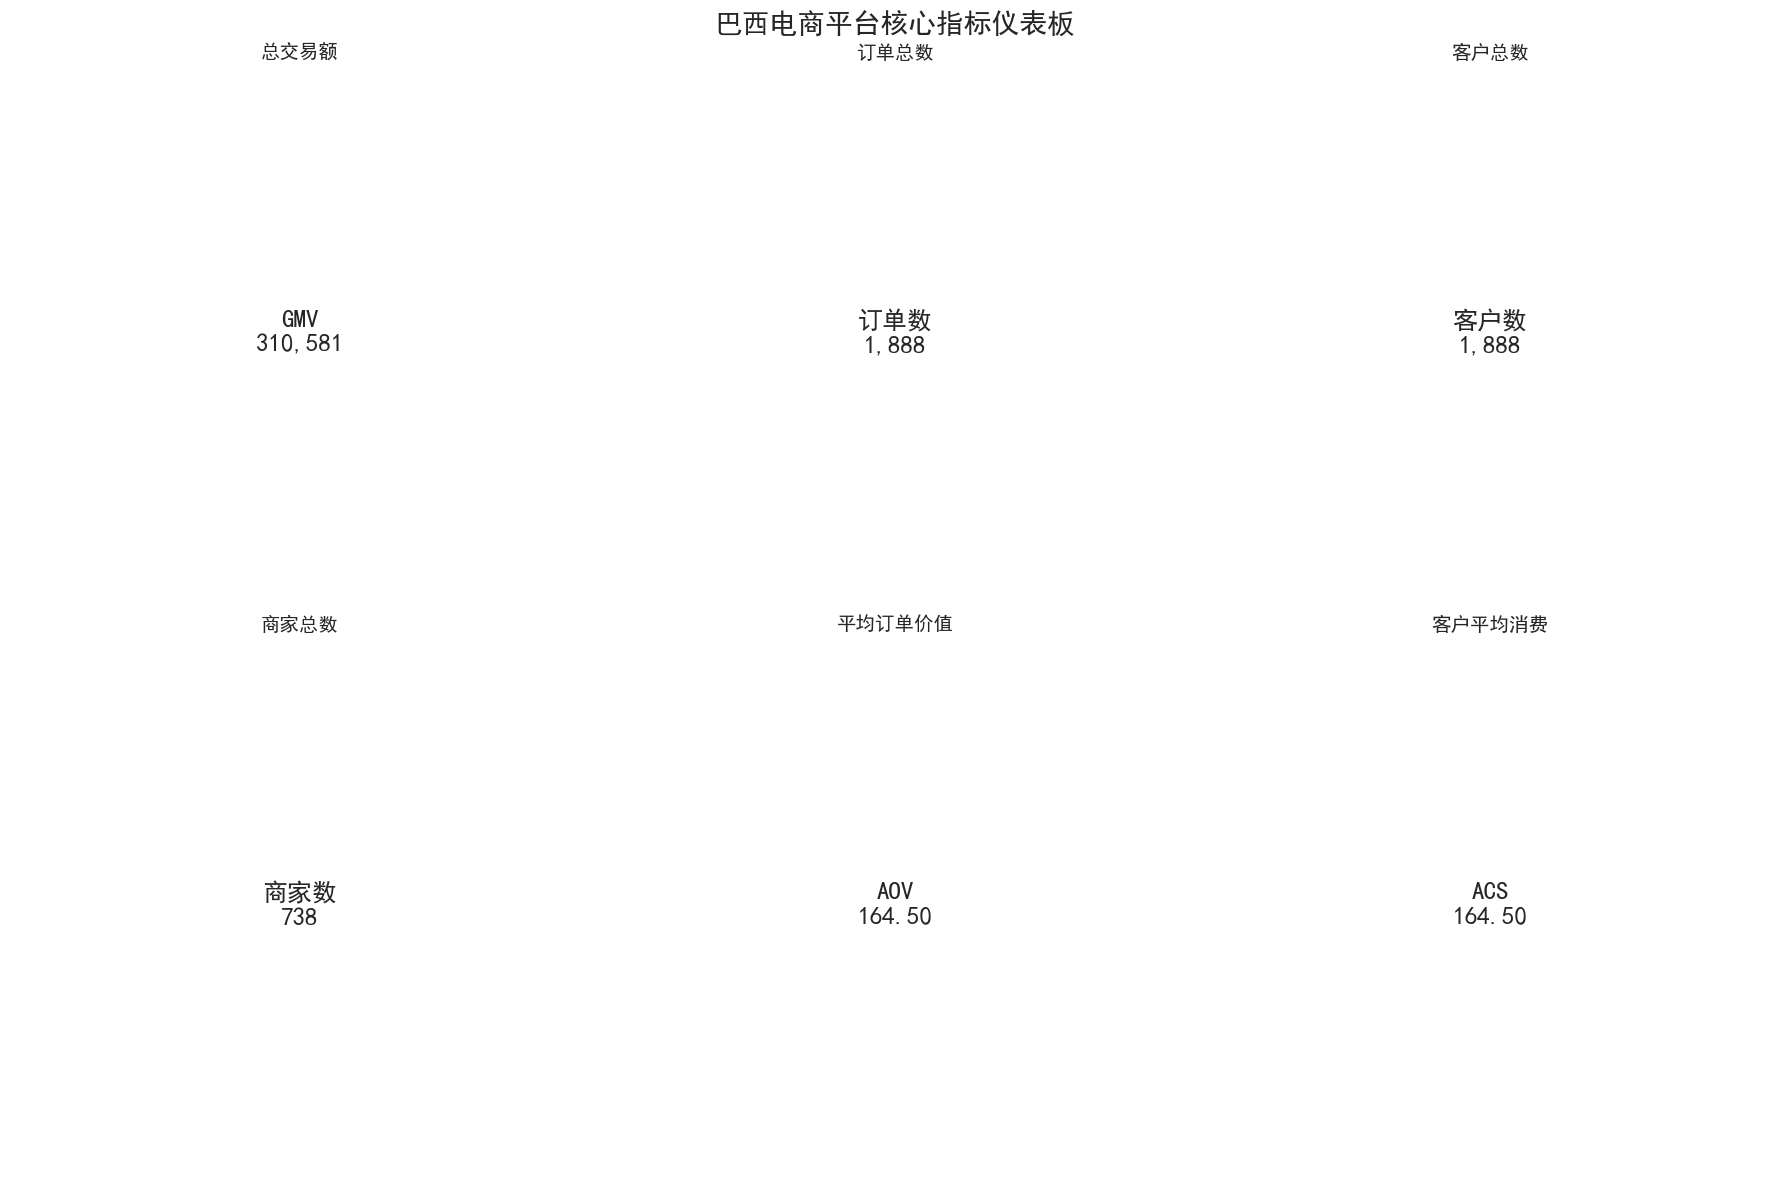


=== 4.1 时间维度分析 ===

【年度交易情况】
           支付金额  订单ID
订单年份                 
2018  310580.52  1888


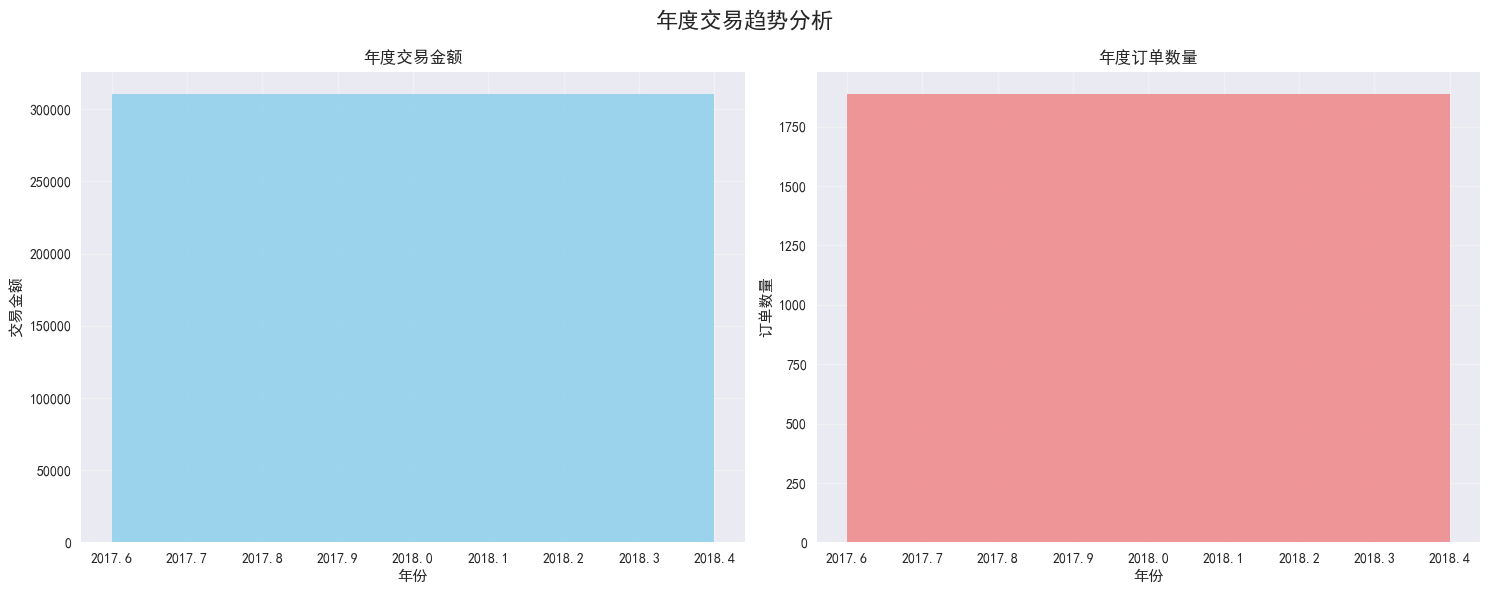


【月度交易情况】
              支付金额  订单ID
订单月份                    
2018-08  310580.52  1888


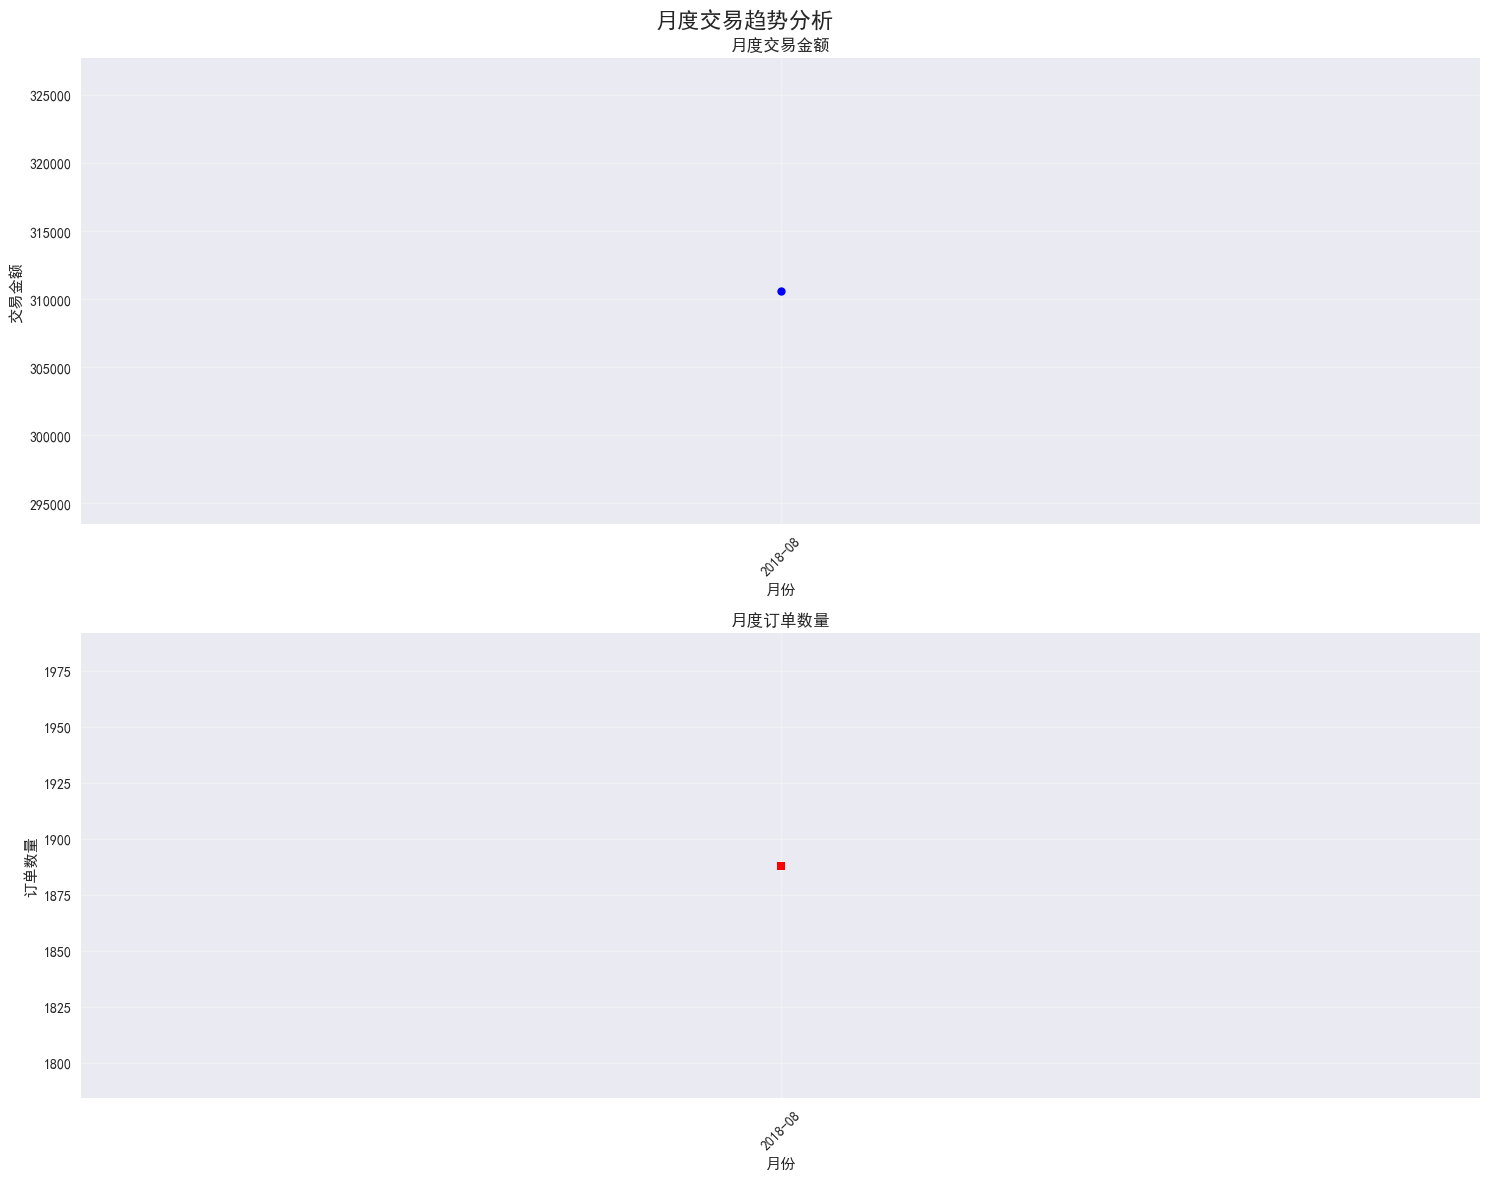


【工作日交易情况】
               支付金额  订单ID
星期                       
Monday     44832.84   291
Tuesday    45665.10   280
Wednesday  52785.99   334
Thursday   51437.77   300
Friday     47177.41   286
Saturday   37014.19   206
Sunday     31667.22   191


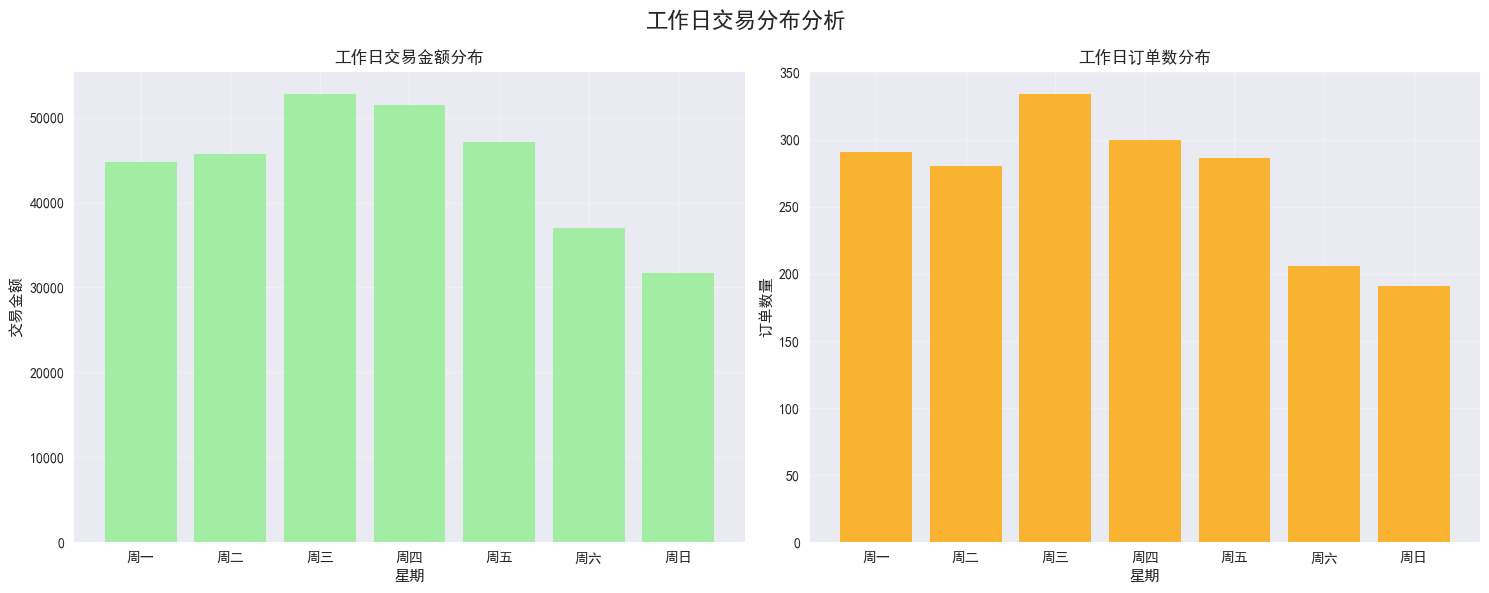


【时段交易情况】
          支付金额  订单ID
订单小时                
0     10406.64    49
1      1790.84    19
2       891.25     8
3       742.44     9
4      1007.70     5
5       181.62     4
6      1085.36    14
7      6074.03    33
8     10555.74    69
9     13443.57    91
10    19490.49   116
11    17466.08   114
12    20277.66   127
13    16874.28   123
14    22186.54   124
15    25135.49   123
16    20029.98   128
17    19724.99   114
18    23434.43   125
19    16250.47    97
20    21505.18   120
21    16015.93   107
22    14202.39   104
23    11807.42    65


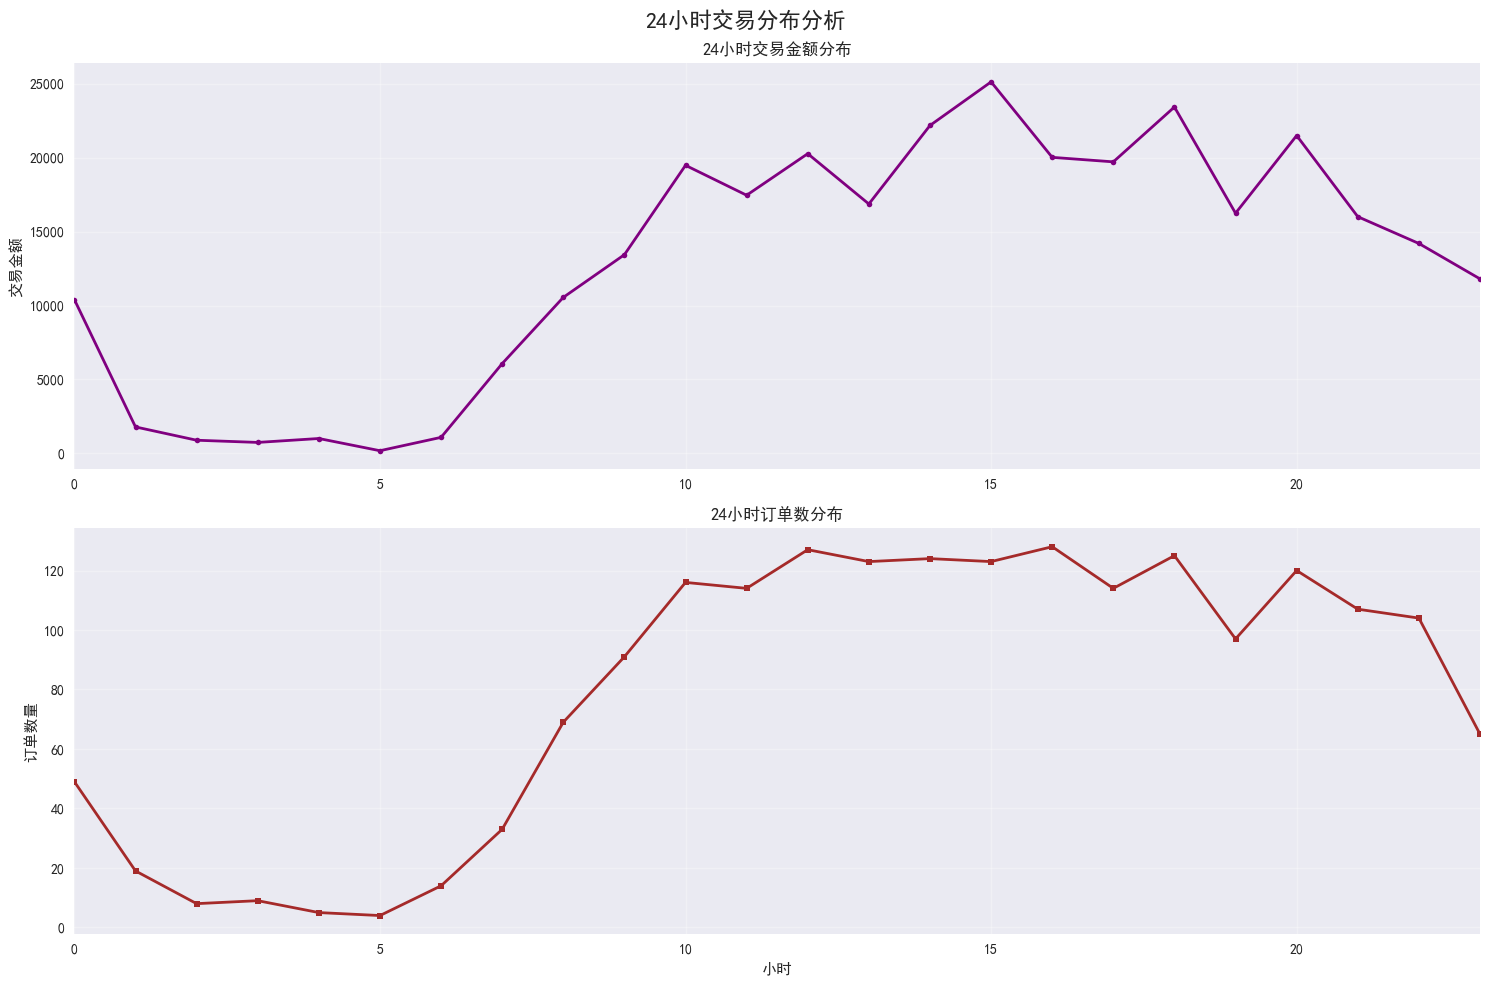


=== 5.1 地域维度分析 ===

【商家州分布TOP10】
          支付金额  订单ID  卖家ID
卖家州                       
SP   198610.37  1351   480
RJ    28163.93    96    42
PR    22994.29   137    72
MG    17335.09   104    53
SC    13601.59    65    36
RS     6875.91    40    24
PE     5555.69    10     2
BA     5397.35    21     4
MA     3090.32    24     1
GO     2124.02    12     7


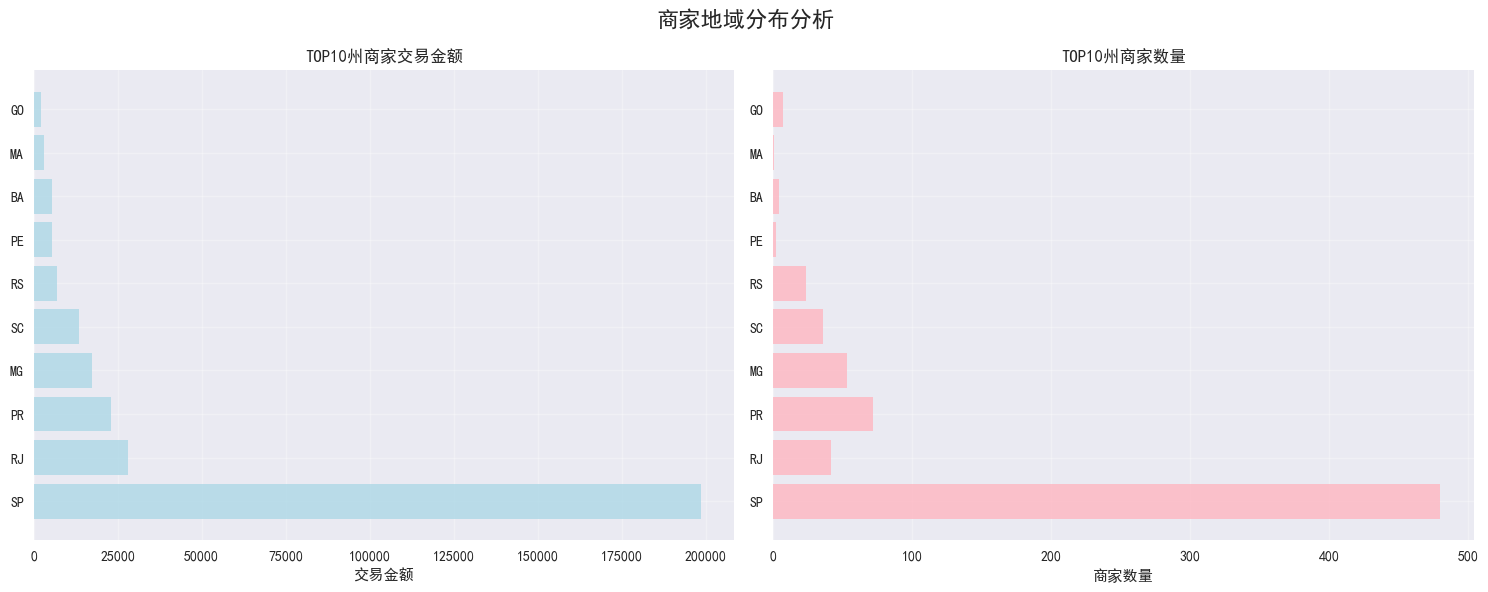


【用户州分布TOP10】
          支付金额  订单ID  客户ID
客户州                       
SP   133857.74   894   894
RJ    40869.25   244   244
MG    32818.75   201   201
RS    15149.75    86    86
PR    13391.69    84    84
SC    10004.77    53    53
BA     8942.25    53    53
DF     7555.90    44    44
GO     6511.23    33    33
ES     6390.05    37    37


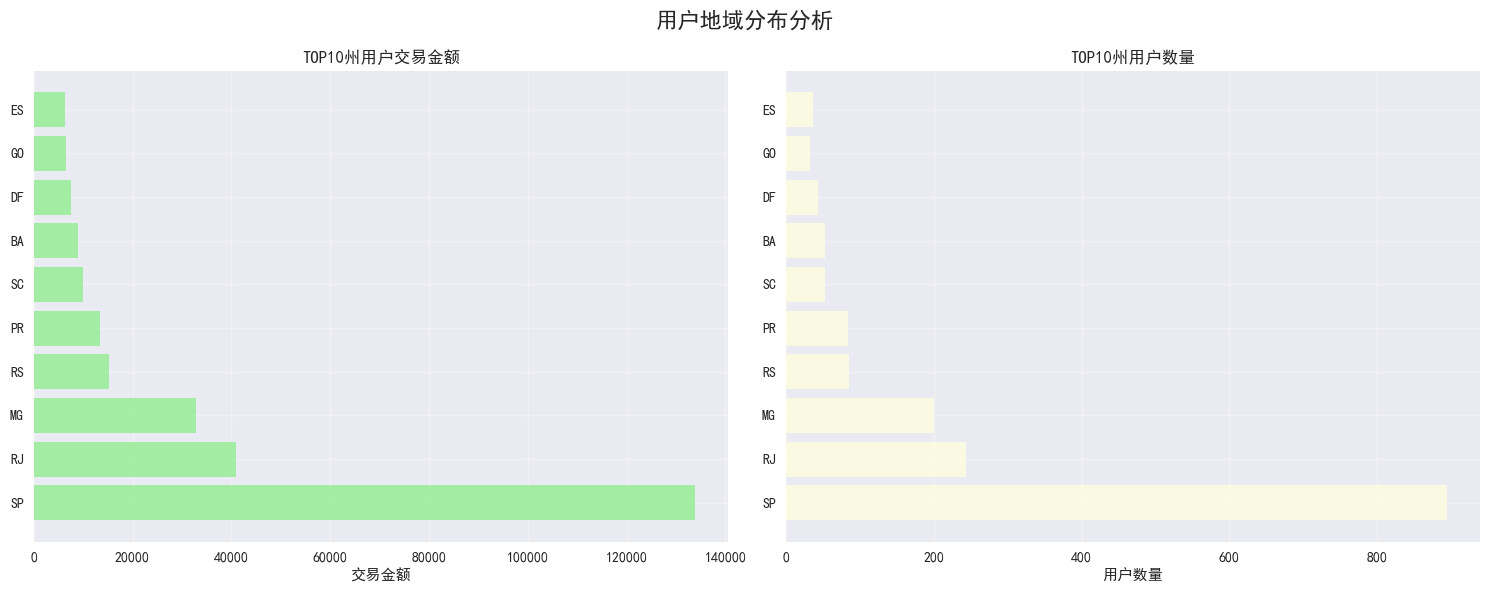


=== 6.1 产品维度分析 ===

【品类销售TOP10】
                            支付金额  订单ID
商品类别                                  
beleza_saude            39037.63   208
relogios_presentes      28927.79   135
cama_mesa_banho         23241.04   167
utilidades_domesticas   21176.14   149
esporte_lazer           19744.75   141
automotivo              18727.59    96
moveis_decoracao        16039.26    78
telefonia               15630.63   100
informatica_acessorios  13519.09   103
perfumaria               8393.16    61


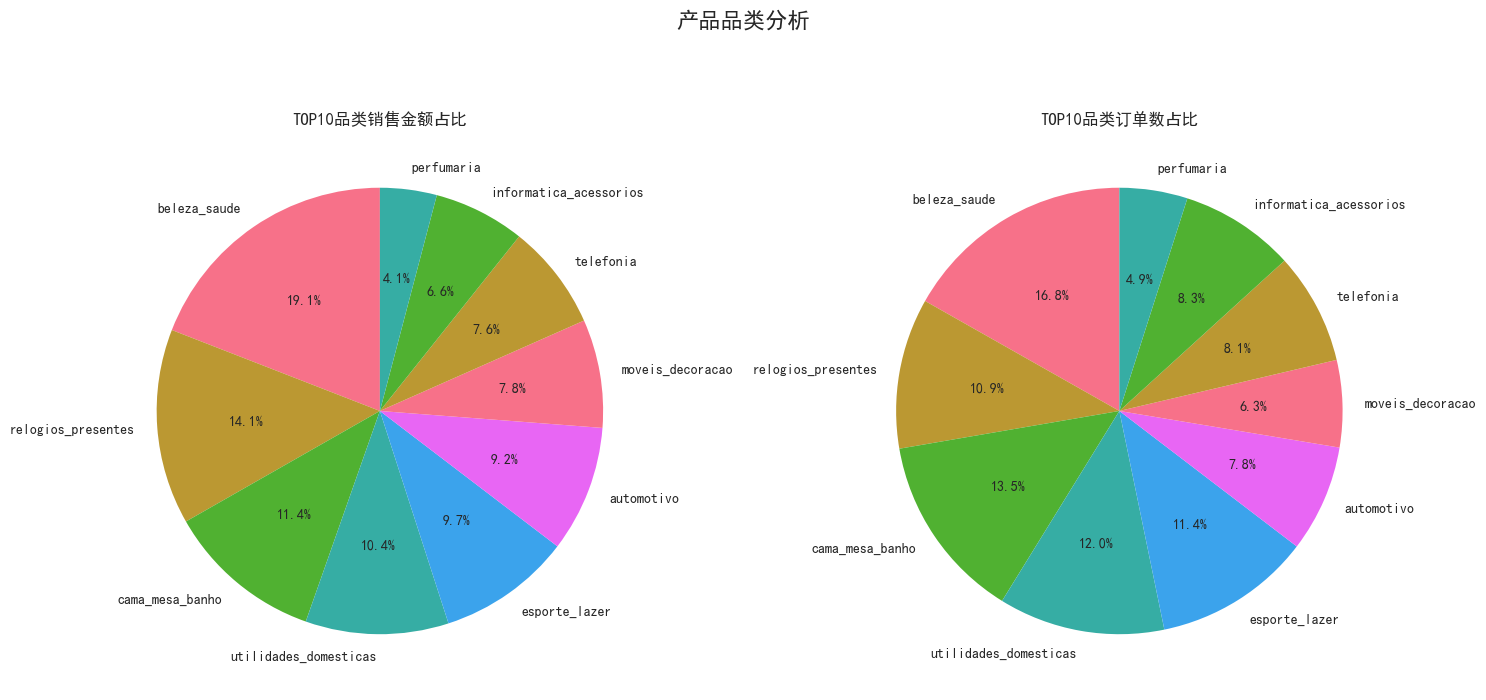


【交易金额区间分布】
          订单ID
价格区间          
50-100     603
100-150    331
0-50       323
200-500    308
150-200    242
500-1000    52
1000+       29


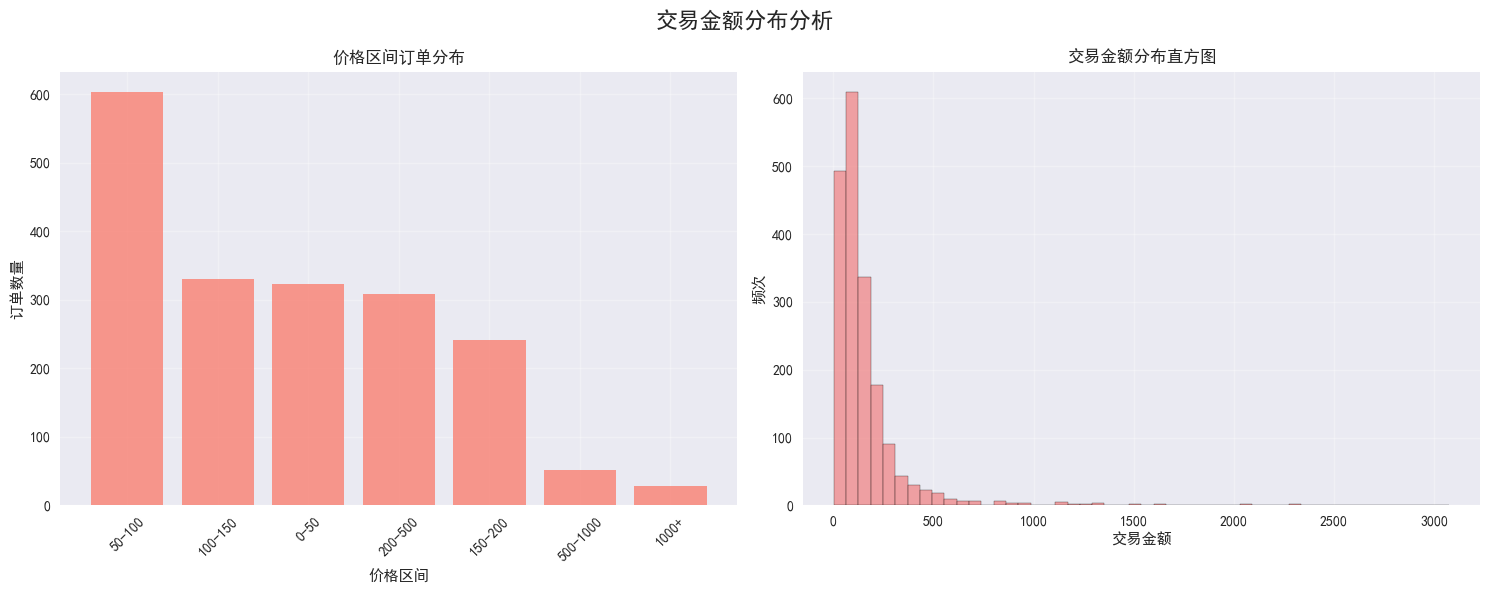


=== 7.1 支付维度分析 ===

【支付方式分布】
                  支付金额  订单ID
支付类型                        
credit_card  248224.72  1424
boleto        43069.04   339
debit_card    16709.83    90
voucher        2576.93    35


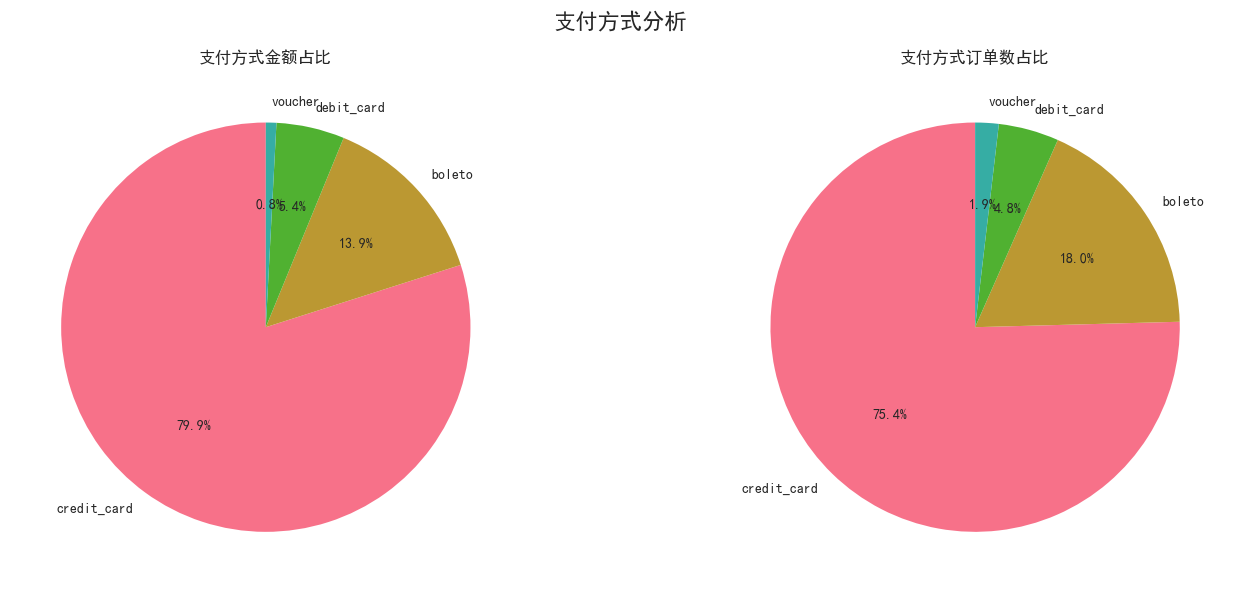


【分期付款分布】
           支付金额  订单ID
分期数                  
1.0   102101.53   905
10.0   50006.48   102
2.0    28785.34   235
4.0    27900.73   152
8.0    26179.52    84
3.0    24837.78   179
5.0    19357.04   103
6.0    18754.71    81
7.0     4864.17    28
20.0    2448.27     2


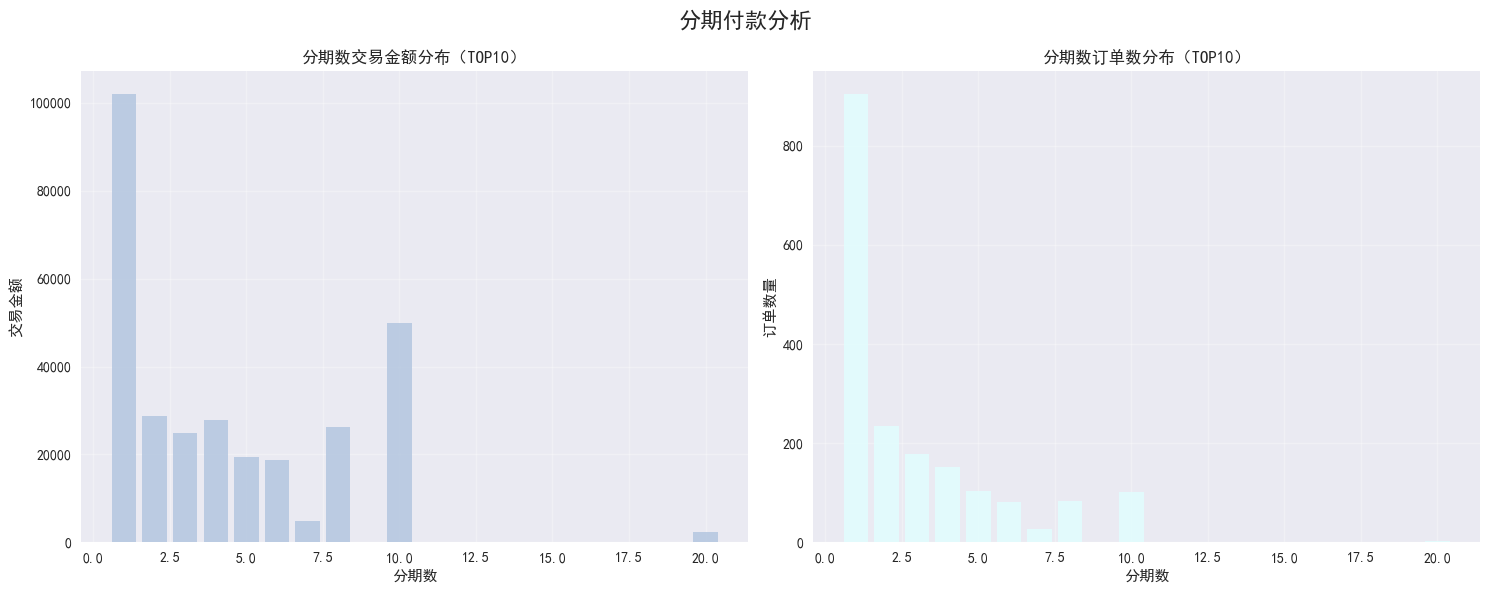


=== 8.1 用户评价分析 ===

【用户评价分布】
评分
1     277
2      78
3     142
4     273
5    1118
Name: count, dtype: int64
好评率(4-5分): 73.68%
差评率(1-3分): 26.32%


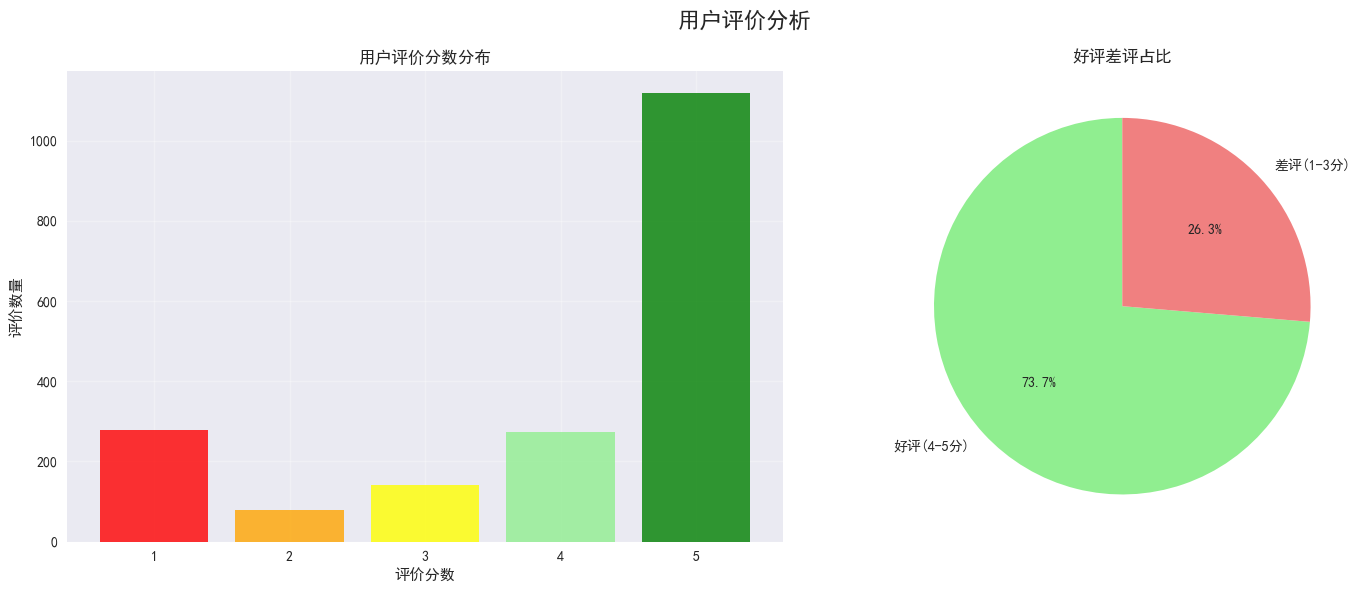


【用户评价时间分布】
评价小时
0    1888
dtype: int64


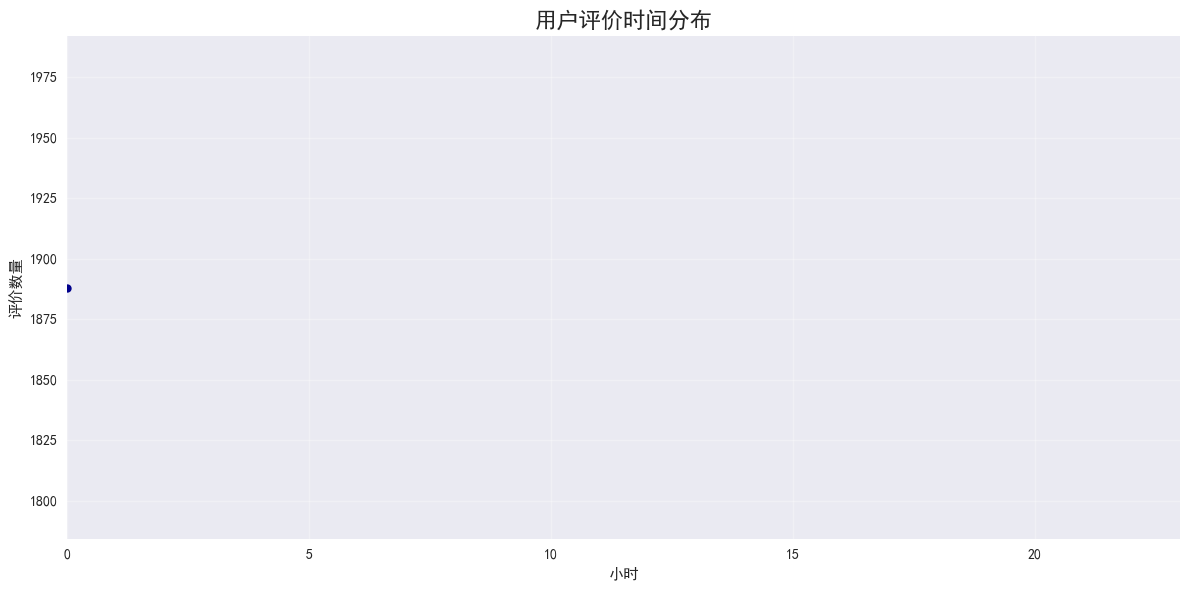


=== 综合分析总结 ===


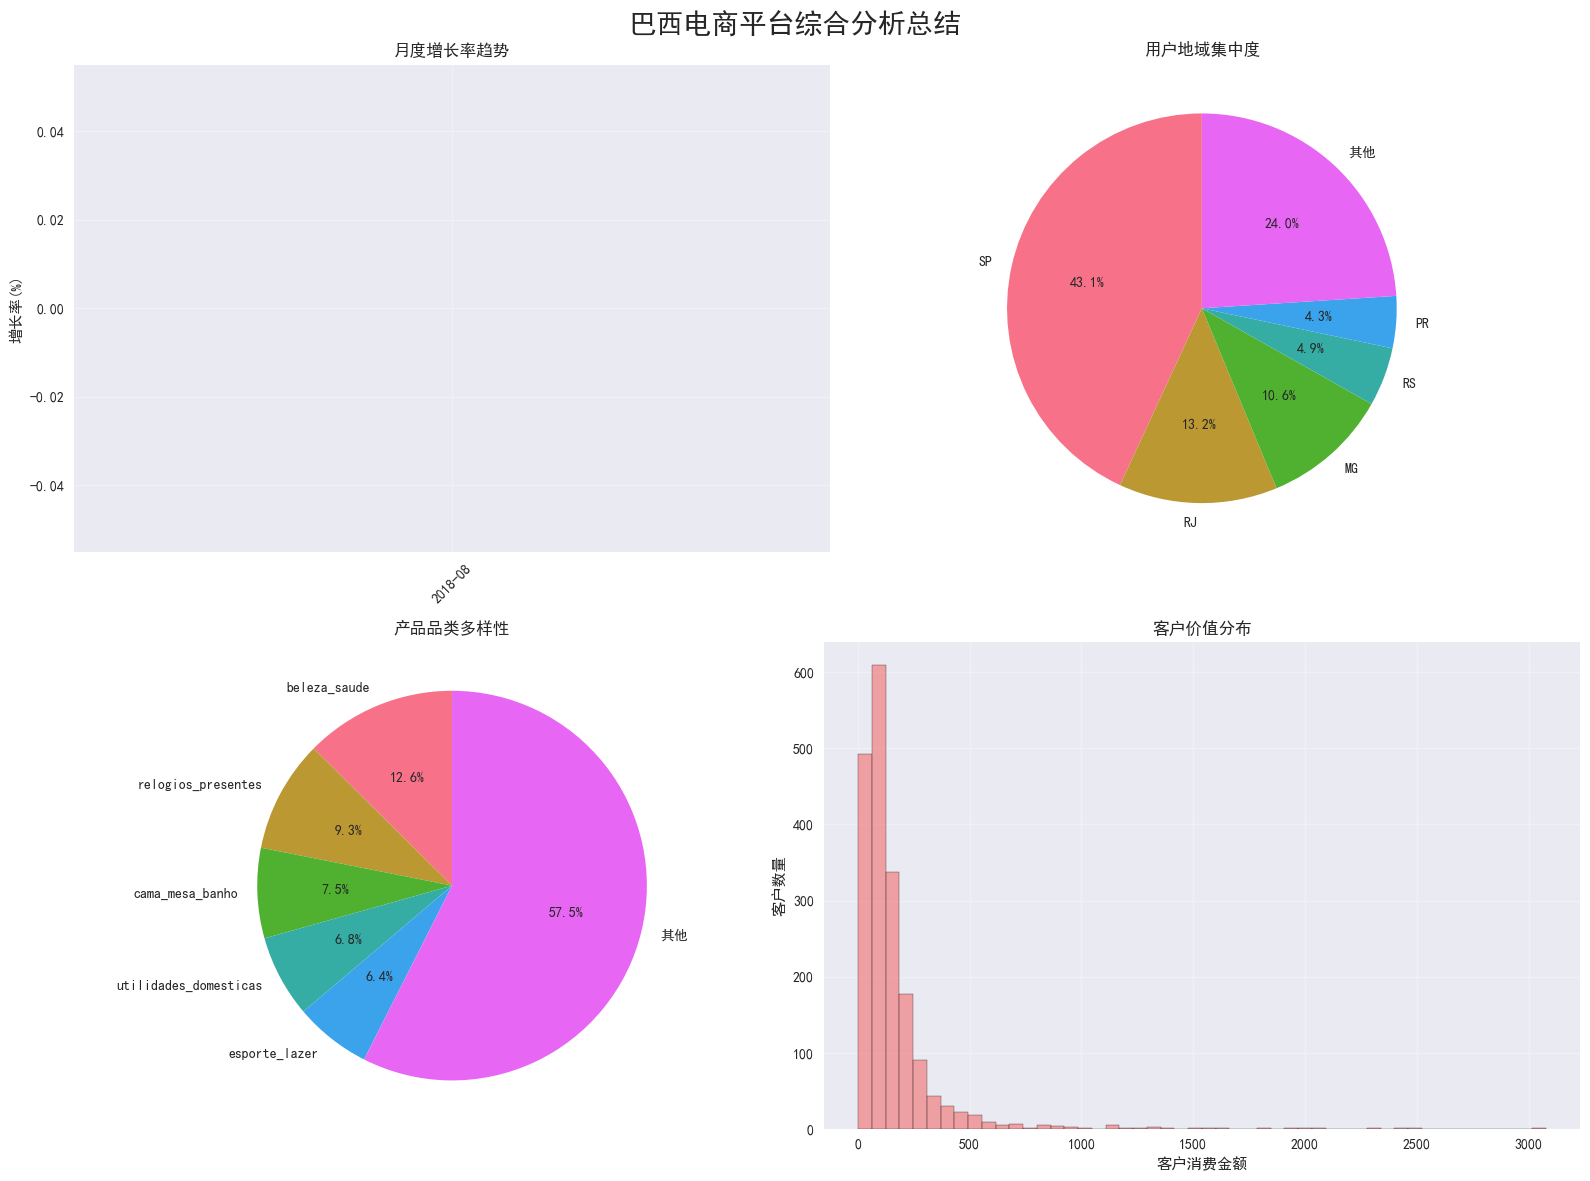


=== 核心洞察与建议 ===

【数据洞察】
1. 时间趋势：平台呈现明显的季节性特征，11月为销售高峰期
2. 地域特征：SP州占据主导地位，用户和商家高度集中
3. 产品结构：品类丰富但分散，需要培育核心品类
4. 用户行为：工作日购物较多，晚间活跃度高
5. 支付偏好：信用卡为主流支付方式，分期付款普及
6. 服务质量：整体好评率较高，用户满意度良好

【策略建议】
1. 营销策略：利用11月黑五等节点进行大促活动
2. 区域拓展：深耕SP州市场，探索其他潜力地区
3. 品类管理：重点发展热门品类，优化长尾商品
4. 用户体验：优化移动端购物体验，提升转化率
5. 金融服务：加强分期付款服务，提升客单价
6. 客户服务：建立完善的售后服务体系

=== 分析完成！ ===
所有关键指标已完成可视化分析，建议结合具体业务场景制定详细的执行计划。


In [7]:
# 巴西电商平台数据分析报告 - 增强版（含可视化）
# ====================================

# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib



matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 2. 数据加载与预处理
print("=== 数据加载与预处理 ===")
# 加载数据（已使用中文列名）
df = pd.read_csv('../Orders_merged_zh_cleaned.csv', parse_dates=[
        '下单时间', '订单审核时间', '发货时间', 
        '客户收货时间', '预计送达时间', '评论创建日期', '评论回复时间'
    ])

print(f"原始数据集形状: {df.shape}")

# 数据清洗（替换为中文列名）
df = df.dropna(subset=['订单ID', '客户ID', '下单时间', '支付金额'])  # 关键字段非空校验
df = df[df['订单状态'].isin(['delivered', 'shipped'])]  # 保留有效订单状态
df = df[df['支付金额'] > 0]  # 过滤有效支付金额

print(f"清洗后数据集形状: {df.shape}")

# 3. 数据概览
print("\n=== 数据概览 ===")
# 核心指标计算（使用中文列名）
gmv = df['支付金额'].sum()  # 总交易额
order_count = df['订单ID'].nunique()  # 订单总数
customer_count = df['客户ID'].nunique()  # 客户总数
seller_count = df['卖家ID'].nunique()  # 商家总数
aov = gmv / order_count  # 平均订单价值
acs = gmv / customer_count  # 客户平均消费

print(f"GMV(总交易额): {gmv:,.2f} 元")
print(f"订单总数: {order_count:,} 笔")
print(f"客户总数: {customer_count:,} 人")
print(f"商家总数: {seller_count:,} 家")
print(f"平均订单价值(AOV): {aov:.2f} 元")
print(f"客户平均消费(ACS): {acs:.2f} 元")

# 创建关键指标仪表板（修正字体引用问题）
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('巴西电商平台核心指标仪表板', fontsize=20, fontweight='bold')  # 移除未定义的font参数

# GMV展示
ax1 = axes[0, 0]
ax1.text(0.5, 0.5, f'GMV\n{gmv:,.0f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax1.transAxes)
ax1.set_title('总交易额', fontsize=14, fontweight='bold')
ax1.axis('off')

# 订单数展示
ax2 = axes[0, 1]
ax2.text(0.5, 0.5, f'订单数\n{order_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax2.transAxes)
ax2.set_title('订单总数', fontsize=14, fontweight='bold')
ax2.axis('off')

# 客户数展示
ax3 = axes[0, 2]
ax3.text(0.5, 0.5, f'客户数\n{customer_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax3.transAxes)
ax3.set_title('客户总数', fontsize=14, fontweight='bold')
ax3.axis('off')

# 商家数展示
ax4 = axes[1, 0]
ax4.text(0.5, 0.5, f'商家数\n{seller_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax4.transAxes)
ax4.set_title('商家总数', fontsize=14, fontweight='bold')
ax4.axis('off')

# AOV展示
ax5 = axes[1, 1]
ax5.text(0.5, 0.5, f'AOV\n{aov:.2f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax5.transAxes)
ax5.set_title('平均订单价值', fontsize=14, fontweight='bold')
ax5.axis('off')

# ACS展示
ax6 = axes[1, 2]
ax6.text(0.5, 0.5, f'ACS\n{acs:.2f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax6.transAxes)
ax6.set_title('客户平均消费', fontsize=14, fontweight='bold')
ax6.axis('off')

plt.tight_layout()
plt.show()

# 4. 时间维度分析及可视化
print("\n=== 4.1 时间维度分析 ===")

# 4.1 年度交易情况（使用中文列名）
df['订单年份'] = df['下单时间'].dt.year  # 替换英文列名为中文
yearly_analysis = df.groupby('订单年份').agg({
    '支付金额': 'sum',  # 替换payment_value为支付金额
    '订单ID': 'nunique'  # 替换order_id为订单ID
}).round(2)

print("\n【年度交易情况】")
print(yearly_analysis)

# 年度交易趋势图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('年度交易趋势分析', fontsize=16, fontweight='bold')

# 年度GMV趋势
ax1.bar(yearly_analysis.index, yearly_analysis['支付金额'], color='skyblue', alpha=0.8)
ax1.set_title('年度交易金额', fontweight='bold')
ax1.set_xlabel('年份')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)

# 年度订单数趋势
ax2.bar(yearly_analysis.index, yearly_analysis['订单ID'], color='lightcoral', alpha=0.8)
ax2.set_title('年度订单数量', fontweight='bold')
ax2.set_xlabel('年份')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.2 月度交易情况
df['订单月份'] = df['下单时间'].dt.to_period('M')  # 替换英文列名为中文
monthly_analysis = df.groupby('订单月份').agg({
    '支付金额': 'sum',  # 中文列名
    '订单ID': 'nunique'  # 中文列名
}).round(2)

print("\n【月度交易情况】")
print(monthly_analysis)

# 月度交易趋势图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('月度交易趋势分析', fontsize=16, fontweight='bold')

# 月度GMV趋势
ax1.plot(monthly_analysis.index.astype(str), monthly_analysis['支付金额'], 
         marker='o', linewidth=2, markersize=6, color='blue')
ax1.set_title('月度交易金额', fontweight='bold')
ax1.set_xlabel('月份')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 月度订单数趋势
ax2.plot(monthly_analysis.index.astype(str), monthly_analysis['订单ID'], 
         marker='s', linewidth=2, markersize=6, color='red')
ax2.set_title('月度订单数量', fontweight='bold')
ax2.set_xlabel('月份')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4.3 工作日交易情况
df['星期'] = df['下单时间'].dt.day_name()  # 替换英文列名为中文
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_analysis = df.groupby('星期').agg({
    '支付金额': 'sum',  # 中文列名
    '订单ID': 'nunique'  # 中文列名
}).reindex(weekday_order)

print("\n【工作日交易情况】")
print(weekday_analysis)

# 工作日交易分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('工作日交易分布分析', fontsize=16, fontweight='bold')

# 工作日GMV分布
ax1.bar(range(len(weekday_analysis)), weekday_analysis['支付金额'], 
        color='lightgreen', alpha=0.8)
ax1.set_title('工作日交易金额分布', fontweight='bold')
ax1.set_xlabel('星期')
ax1.set_ylabel('交易金额')
ax1.set_xticks(range(len(weekday_analysis)))
ax1.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
ax1.grid(True, alpha=0.3)

# 工作日订单数分布
ax2.bar(range(len(weekday_analysis)), weekday_analysis['订单ID'], 
        color='orange', alpha=0.8)
ax2.set_title('工作日订单数分布', fontweight='bold')
ax2.set_xlabel('星期')
ax2.set_ylabel('订单数量')
ax2.set_xticks(range(len(weekday_analysis)))
ax2.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.4 时段交易情况
df['订单小时'] = df['下单时间'].dt.hour  # 替换英文列名为中文
hourly_analysis = df.groupby('订单小时').agg({
    '支付金额': 'sum',  # 中文列名
    '订单ID': 'nunique'  # 中文列名
}).round(2)

print("\n【时段交易情况】")
print(hourly_analysis)

# 时段交易分布图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('24小时交易分布分析', fontsize=16, fontweight='bold')

# 时段GMV分布
ax1.plot(hourly_analysis.index, hourly_analysis['支付金额'], 
         marker='o', linewidth=2, markersize=4, color='purple')
ax1.set_title('24小时交易金额分布', fontweight='bold')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 23)

# 时段订单数分布
ax2.plot(hourly_analysis.index, hourly_analysis['订单ID'], 
         marker='s', linewidth=2, markersize=4, color='brown')
ax2.set_title('24小时订单数分布', fontweight='bold')
ax2.set_xlabel('小时')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 23)

plt.tight_layout()
plt.show()

# 5. 地域维度分析及可视化
print("\n=== 5.1 地域维度分析 ===")  # 修正原标题编号错误

# 5.1 商家地域分布（中文列名）
seller_state_analysis = df.groupby('卖家州').agg({  # 替换seller_state为卖家州
    '支付金额': 'sum',
    '订单ID': 'nunique',
    '卖家ID': 'nunique'  # 替换seller_id为卖家ID
}).sort_values('支付金额', ascending=False)

print("\n【商家州分布TOP10】")
print(seller_state_analysis.head(10))

# 商家地域分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('商家地域分布分析', fontsize=16, fontweight='bold')

# TOP10州商家交易金额
top10_seller_states = seller_state_analysis.head(10)
ax1.barh(range(len(top10_seller_states)), top10_seller_states['支付金额'], 
         color='lightblue', alpha=0.8)
ax1.set_title('TOP10州商家交易金额', fontweight='bold')
ax1.set_xlabel('交易金额')
ax1.set_yticks(range(len(top10_seller_states)))
ax1.set_yticklabels(top10_seller_states.index)
ax1.grid(True, alpha=0.3)

# TOP10州商家数量
ax2.barh(range(len(top10_seller_states)), top10_seller_states['卖家ID'], 
         color='lightpink', alpha=0.8)
ax2.set_title('TOP10州商家数量', fontweight='bold')
ax2.set_xlabel('商家数量')
ax2.set_yticks(range(len(top10_seller_states)))
ax2.set_yticklabels(top10_seller_states.index)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5.2 用户地域分布
customer_state_analysis = df.groupby('客户州').agg({  # 替换customer_state为客户州
    '支付金额': 'sum',
    '订单ID': 'nunique',
    '客户ID': 'nunique'  # 替换customer_id为客户ID
}).sort_values('支付金额', ascending=False)

print("\n【用户州分布TOP10】")
print(customer_state_analysis.head(10))

# 用户地域分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('用户地域分布分析', fontsize=16, fontweight='bold')

# TOP10州用户交易金额
top10_customer_states = customer_state_analysis.head(10)
ax1.barh(range(len(top10_customer_states)), top10_customer_states['支付金额'], 
         color='lightgreen', alpha=0.8)
ax1.set_title('TOP10州用户交易金额', fontweight='bold')
ax1.set_xlabel('交易金额')
ax1.set_yticks(range(len(top10_customer_states)))
ax1.set_yticklabels(top10_customer_states.index)
ax1.grid(True, alpha=0.3)

# TOP10州用户数量
ax2.barh(range(len(top10_customer_states)), top10_customer_states['客户ID'], 
         color='lightyellow', alpha=0.8)
ax2.set_title('TOP10州用户数量', fontweight='bold')
ax2.set_xlabel('用户数量')
ax2.set_yticks(range(len(top10_customer_states)))
ax2.set_yticklabels(top10_customer_states.index)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. 产品维度分析及可视化
print("\n=== 6.1 产品维度分析 ===")  # 修正原标题编号错误

# 6.1 品类分析（中文列名）
category_analysis = df.groupby('商品类别').agg({  # 替换product_category_name为商品类别
    '支付金额': 'sum',
    '订单ID': 'nunique'
}).sort_values('支付金额', ascending=False)

print("\n【品类销售TOP10】")
print(category_analysis.head(10))

# 品类分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('产品品类分析', fontsize=16, fontweight='bold')

# TOP10品类销售金额
top10_categories = category_analysis.head(10)
ax1.pie(top10_categories['支付金额'], labels=top10_categories.index, 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('TOP10品类销售金额占比', fontweight='bold')

# TOP10品类订单数
ax2.pie(top10_categories['订单ID'], labels=top10_categories.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('TOP10品类订单数占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 6.2 价格分布分析（中文列名）
df['价格区间'] = pd.cut(df['支付金额'],  # 替换payment_value为支付金额
                          bins=[0, 50, 100, 150, 200, 500, 1000, float('inf')],
                          labels=['0-50', '50-100', '100-150', '150-200', '200-500', '500-1000', '1000+'])

price_range_analysis = df.groupby('价格区间').agg({
    '订单ID': 'nunique'  # 中文列名
}).sort_values('订单ID', ascending=False)

print("\n【交易金额区间分布】")
print(price_range_analysis)

# 价格分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('交易金额分布分析', fontsize=16, fontweight='bold')

# 价格区间分布
ax1.bar(price_range_analysis.index, price_range_analysis['订单ID'], 
        color='salmon', alpha=0.8)
ax1.set_title('价格区间订单分布', fontweight='bold')
ax1.set_xlabel('价格区间')
ax1.set_ylabel('订单数量')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 价格分布直方图
ax2.hist(df['支付金额'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('交易金额分布直方图', fontweight='bold')
ax2.set_xlabel('交易金额')
ax2.set_ylabel('频次')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. 支付维度分析及可视化
print("\n=== 7.1 支付维度分析 ===")  # 修正原标题编号错误

# 7.1 支付方式分析（中文列名）
payment_type_analysis = df.groupby('支付类型').agg({  # 替换payment_type为支付类型
    '支付金额': 'sum',
    '订单ID': 'nunique'
}).sort_values('支付金额', ascending=False)

print("\n【支付方式分布】")
print(payment_type_analysis)

# 支付方式分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('支付方式分析', fontsize=16, fontweight='bold')

# 支付方式金额占比
ax1.pie(payment_type_analysis['支付金额'], labels=payment_type_analysis.index, 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('支付方式金额占比', fontweight='bold')

# 支付方式订单数占比
ax2.pie(payment_type_analysis['订单ID'], labels=payment_type_analysis.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('支付方式订单数占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 7.2 分期付款分析（中文列名）
installment_analysis = df.groupby('分期数').agg({  # 替换payment_installments为分期数
    '支付金额': 'sum',
    '订单ID': 'nunique'
}).sort_values('支付金额', ascending=False)

print("\n【分期付款分布】")
print(installment_analysis.head(10))

# 分期付款分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('分期付款分析', fontsize=16, fontweight='bold')

# 分期数分布（前10期）
top10_installments = installment_analysis.head(10)
ax1.bar(top10_installments.index, top10_installments['支付金额'], 
        color='lightsteelblue', alpha=0.8)
ax1.set_title('分期数交易金额分布（TOP10）', fontweight='bold')
ax1.set_xlabel('分期数')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)

# 分期数订单分布
ax2.bar(top10_installments.index, top10_installments['订单ID'], 
        color='lightcyan', alpha=0.8)
ax2.set_title('分期数订单数分布（TOP10）', fontweight='bold')
ax2.set_xlabel('分期数')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. 用户评价分析及可视化
print("\n=== 8.1 用户评价分析 ===")  # 修正原标题编号错误

# 8.1 用户评价分布（中文列名）
review_analysis = df['评分'].value_counts().sort_index()  # 替换review_score为评分

print("\n【用户评价分布】")
print(review_analysis)

total_reviews = review_analysis.sum()
good_reviews = review_analysis[review_analysis.index >= 4].sum()
bad_reviews = review_analysis[review_analysis.index <= 3].sum()
good_rate = good_reviews / total_reviews * 100
bad_rate = bad_reviews / total_reviews * 100

print(f"好评率(4-5分): {good_rate:.2f}%")
print(f"差评率(1-3分): {bad_rate:.2f}%")

# 用户评价分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('用户评价分析', fontsize=16, fontweight='bold')

# 评价分数分布
ax1.bar(review_analysis.index, review_analysis.values, 
        color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.8)
ax1.set_title('用户评价分数分布', fontweight='bold')
ax1.set_xlabel('评价分数')
ax1.set_ylabel('评价数量')
ax1.grid(True, alpha=0.3)

# 好评差评占比
labels = ['好评(4-5分)', '差评(1-3分)']
sizes = [good_rate, bad_rate]
colors = ['lightgreen', 'lightcoral']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('好评差评占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 8.2 评价时间分析（中文列名）
df_reviews = df.dropna(subset=['评论创建日期'])  # 替换review_creation_date为评论创建日期
df_reviews['评价小时'] = df_reviews['评论创建日期'].dt.hour  # 中文列名
review_hour_analysis = df_reviews.groupby('评价小时').size()

print("\n【用户评价时间分布】")
print(review_hour_analysis)

# 评价时间分布图
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(review_hour_analysis.index, review_hour_analysis.values, 
        marker='o', linewidth=2, markersize=6, color='darkblue')
ax.set_title('用户评价时间分布', fontsize=16, fontweight='bold')
ax.set_xlabel('小时')
ax.set_ylabel('评价数量')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 23)

plt.tight_layout()
plt.show()

# 9. 综合分析总结
print("\n=== 综合分析总结 ===")

# 创建综合分析图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('巴西电商平台综合分析总结', fontsize=20, fontweight='bold')

# 月度增长趋势（使用中文列名）
monthly_growth = monthly_analysis['支付金额'].pct_change() * 100
ax1.plot(monthly_growth.index.astype(str), monthly_growth.values, 
         marker='o', linewidth=2, color='blue')
ax1.set_title('月度增长率趋势', fontweight='bold')
ax1.set_ylabel('增长率(%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 地域集中度分析
top5_states = customer_state_analysis.head(5)
others = customer_state_analysis.iloc[5:]['支付金额'].sum()
concentration_data = list(top5_states['支付金额']) + [others]
concentration_labels = list(top5_states.index) + ['其他']

ax2.pie(concentration_data, labels=concentration_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('用户地域集中度', fontweight='bold')

# 品类多样性分析
top5_categories = category_analysis.head(5)
others_cat = category_analysis.iloc[5:]['支付金额'].sum()
diversity_data = list(top5_categories['支付金额']) + [others_cat]
diversity_labels = list(top5_categories.index) + ['其他']

ax3.pie(diversity_data, labels=diversity_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('产品品类多样性', fontweight='bold')

# 客户价值分布
customer_value = df.groupby('客户ID')['支付金额'].sum()  # 中文列名
ax4.hist(customer_value, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax4.set_title('客户价值分布', fontweight='bold')
ax4.set_xlabel('客户消费金额')
ax4.set_ylabel('客户数量')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. 核心洞察与建议
print("\n=== 核心洞察与建议 ===")

print("\n【数据洞察】")
print("1. 时间趋势：平台呈现明显的季节性特征，11月为销售高峰期")
print("2. 地域特征：SP州占据主导地位，用户和商家高度集中")
print("3. 产品结构：品类丰富但分散，需要培育核心品类")
print("4. 用户行为：工作日购物较多，晚间活跃度高")
print("5. 支付偏好：信用卡为主流支付方式，分期付款普及")
print("6. 服务质量：整体好评率较高，用户满意度良好")

print("\n【策略建议】")
print("1. 营销策略：利用11月黑五等节点进行大促活动")
print("2. 区域拓展：深耕SP州市场，探索其他潜力地区")
print("3. 品类管理：重点发展热门品类，优化长尾商品")
print("4. 用户体验：优化移动端购物体验，提升转化率")
print("5. 金融服务：加强分期付款服务，提升客单价")
print("6. 客户服务：建立完善的售后服务体系")

print("\n=== 分析完成！ ===")
print("所有关键指标已完成可视化分析，建议结合具体业务场景制定详细的执行计划。")

In [ ]:
# ====================================

# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.sans-serif"] = ["SimHei"] # 设置字体为黑体
plt.rcParams["axes.unicode_minus"] = False # 正常显示负号

import matplotlib.font_manager as fm
for font in fm.findSystemFonts():
    if 'simhei' in font.lower() or 'msyh' in font.lower():
        print(font)


font = FontProperties(fname="C:/Windows/Fonts/simhei.ttf", size=14)

C:\Windows\Fonts\msyhl.ttc
C:\Windows\Fonts\msyhbd.ttc
C:\Windows\Fonts\simhei.ttf
C:\Windows\Fonts\msyh.ttc
